# Road Accident Analysis
## Task-5

![## Road Accidents](https://www.leonsautobody.com/wp-content/uploads/2022/05/shutterstock_250536799.jpg)

## __Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.__

## Understanding the data
##### importing/understand the data

In [1]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import warnings
import imblearn


import numpy as np
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('/kaggle/input/road-traffic-accidents/RTA Dataset.csv')
column = df.columns
# all the categorical columns
cat_columns = [colname for colname in df.select_dtypes(["object", "category"])]
len(cat_columns)

30

In [3]:
# describe categorical columns
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [4]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


## Exploratory Data Analysis
### putting the data in a visualizing way and in bar charts to see the outcome.

In [5]:
#saw this code on how to do subplot on graphs
def subplot(df, i, column, order=None, palette=None):
    plt.subplot(2, 3, i)
    sns.barplot(data=df[column].value_counts().reset_index(), x=column, y='count', palette=palette, order=order)
    plt.xticks(rotation=45)

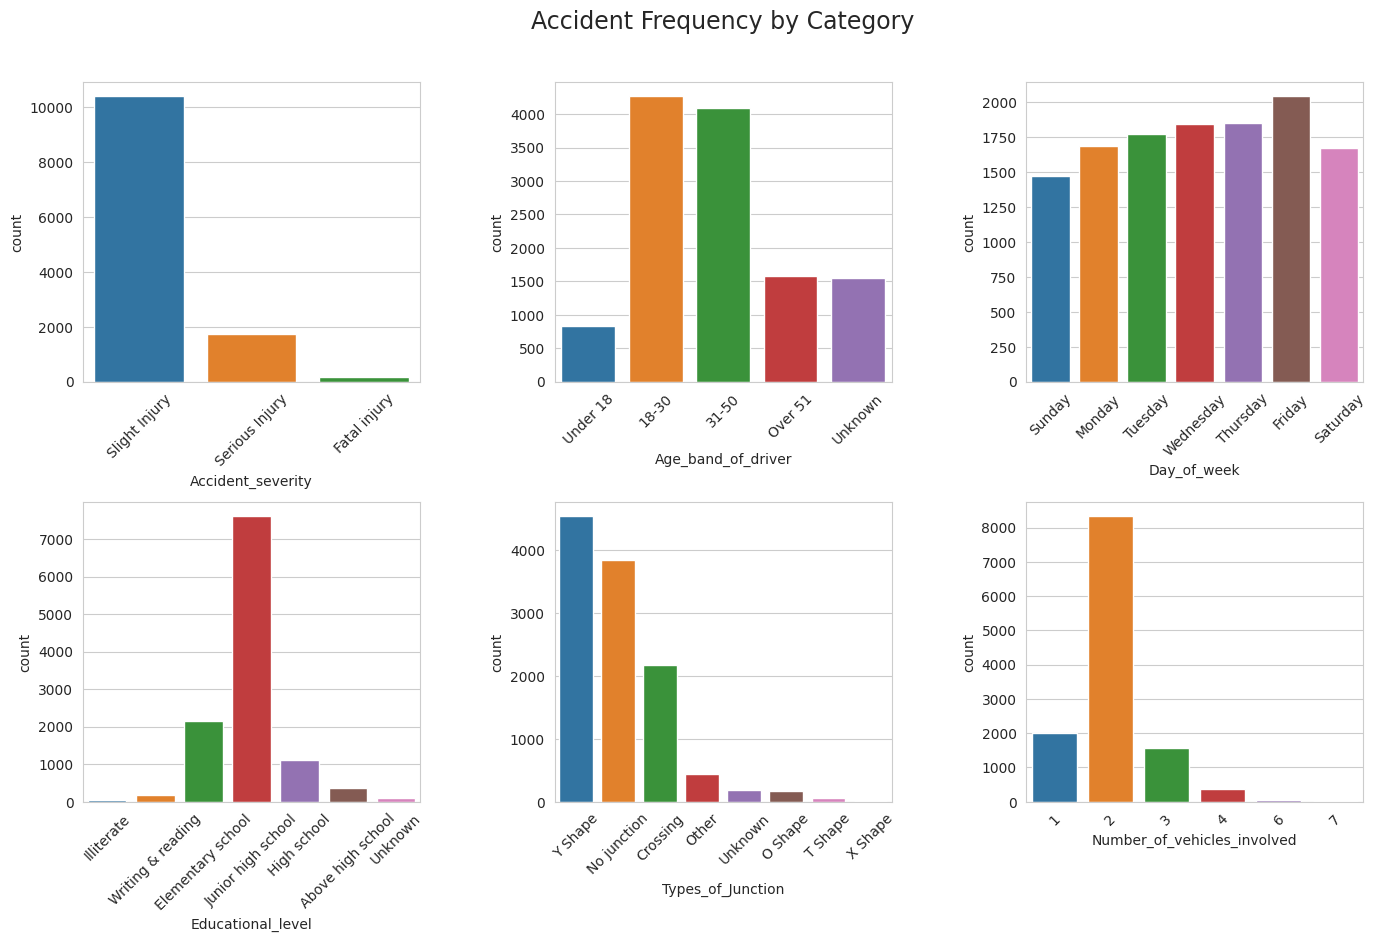

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
plt.suptitle("Accident Frequency by Category", fontsize=17)

subplot(df, i=1, column = 'Accident_severity')

age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
subplot(df, i=2, column = 'Age_band_of_driver', order= age_order)

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
subplot(df, i=3, column = 'Day_of_week', order=day_order)

education_order= ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]
subplot(df, i=4, column = 'Educational_level', order=education_order)

subplot(df, i=5, column = 'Types_of_Junction')
subplot(df, i=6, column = 'Number_of_vehicles_involved')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

<div class="alert alert-block alert-info">
<b>Results</b>  - And in these graphs we can see there most cases.The accidents results in slight injury.And the H Band of Driver lies majority in the 18 to 50 age range. 
    
- Road accidents tend to happen on Friday more than other days. This could be due to the end of the work week and rush hours to go home.
    
- And the education level that led to the highest chance of road accident.Resulted in reading and writing at an elementary school as well as junior high school level of education.This could indicate a connection between low level of education and a tendency to encounter an accident. 
    
- And as data shown, Y shapes and no junction as well as crossing road type led to the highest counts of Rd. accident. 
    
- And in most cases, the number of vehicles involved in accidents are usually 1-2 or three.Mostly two. 

</div>

In [7]:
def fatality_df(column, df=df, sort=False):
    """
    fetches a dataframe having category wise fatality frequency
    """
# finding out the relationship between Accident severity and a column
    df_hello = df.groupby(['Accident_severity', column]).Time.count().reset_index()

    # creating a list of all categories to plot
    rowlist = [row for row in df_hello[column]]
    sumlist = []
    for row in rowlist:
        sumlist.append(df_hello.loc[df_hello[column] == row].Time.sum())

    df_hello['sum'] = sumlist
    df_hello['ratio'] = df_hello['Time']/df_hello['sum']
    df_final = df_hello.loc[df_hello.Accident_severity=='Fatal injury']
    if sort==True:
        df_final = df_final.sort_values(by='ratio')
    return df_final

# example
fatal_collisiontype_df = fatality_df('Type_of_collision', sort=True)
fatal_collisiontype_df

,Accident_severity,Type_of_collision,Time,sum,ratio
3,Fatal injury,Rollover,4,397,0.010076
0,Fatal injury,Collision with animals,2,171,0.011696
4,Fatal injury,Vehicle with vehicle collision,104,8774,0.011853
2,Fatal injury,Collision with roadside objects,24,1786,0.013438
1,Fatal injury,Collision with pedestrians,22,896,0.024554


In [8]:
def fatal_palette(df, positions_to_change: list):
    """
    A function to create grey red palettes according to the inputs
    You just need to pass in the dataframe and the index of labels to be highlighted in red
    """
    palette = ['#96898b']*df.shape[0]
    new_values = ['#cc253b']*len(positions_to_change)
    for position, new_value in zip(positions_to_change, new_values):
        palette[position] = new_value
    return sns.color_palette(palette)
    
# example
fatal_palette(fatality_df('Types_of_Junction'), [0, 1])

[(0.8, 0.1450980392156863, 0.23137254901960785),
 (0.8, 0.1450980392156863, 0.23137254901960785),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862)]

In [9]:
def fatal_plot(i, column, red_list, order=None, custom_labels=None, subplot=True, sort=False):
    """
    Plot charts using the fatality_df and fatal_palette. 
    Used to plot values in a column against the fatality frequency.  
    """
    if subplot==True:
        plt.subplot(2, 3 ,i)
    sns.barplot(data=fatality_df(column, sort=sort), x=column, y='ratio', palette=fatal_palette(fatality_df(column, sort=sort), red_list), order=order)
    
    # pass in custom x labels
    if custom_labels is not None:
        # Get the current x-axis tick positions
        xtick_positions = plt.xticks()[0]
        # Set the custom labels at the desired positions
        plt.xticks(xtick_positions, custom_labels)
        
    plt.xticks(rotation=45)
    plt.xlabel(column, fontsize= 14).set_color('#425169')
    plt.ylabel('Fatality ratio', fontsize= 14).set_color('#425169')
    ax = plt.gca()
    ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(1)

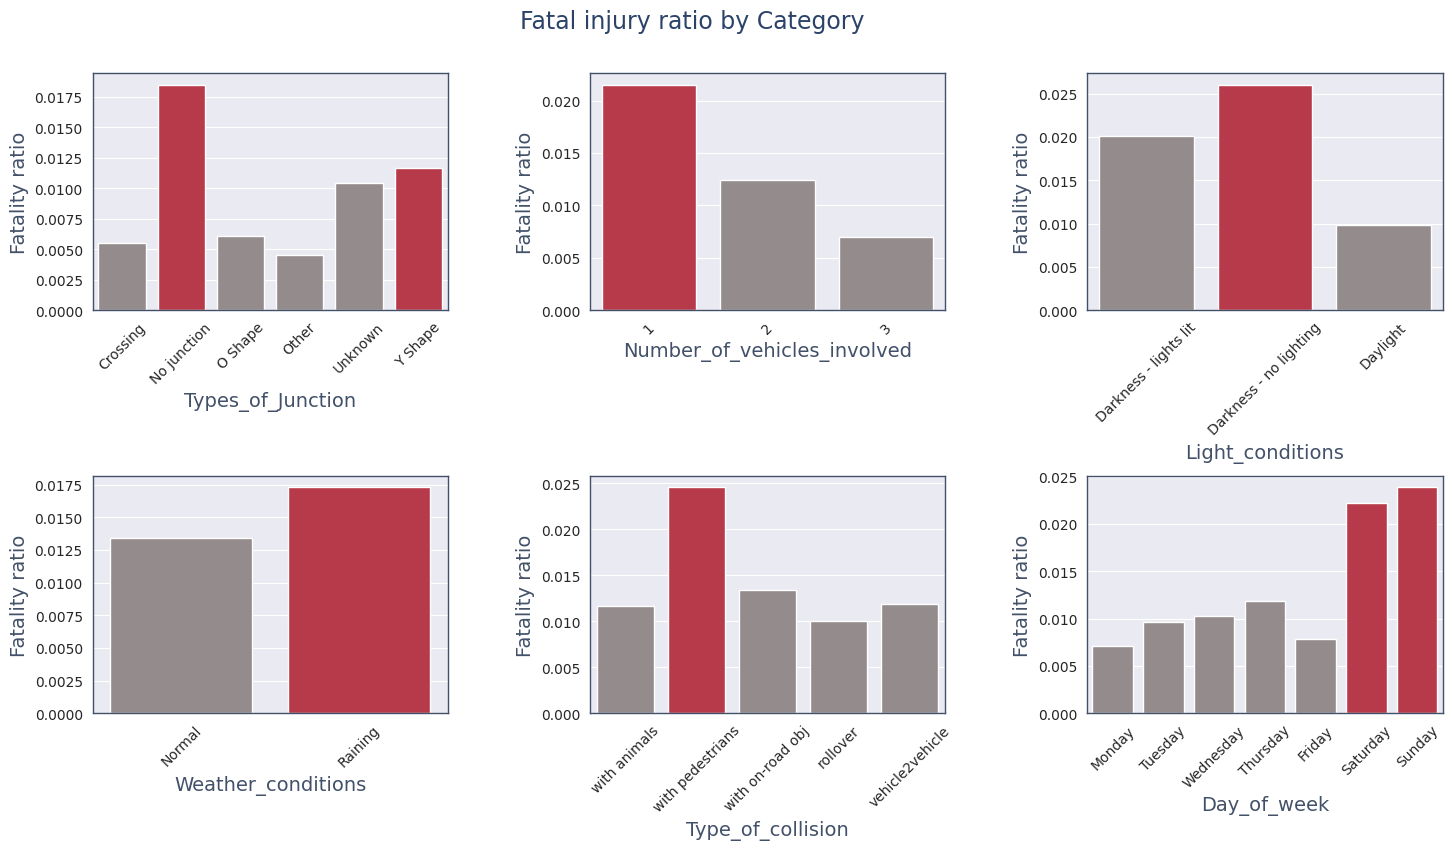

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
plt.suptitle("Fatal injury ratio by Category", fontsize=17).set_color('#2c4369')

fatal_plot(1, 'Types_of_Junction', [1, 5])
fatal_plot(2, 'Number_of_vehicles_involved', [0])
fatal_plot(3, 'Light_conditions', [1])
fatal_plot(4, 'Weather_conditions', [1])
fatal_plot(5, 'Type_of_collision', [1], custom_labels = ['with animals', 'with pedestrians', 'with on-road obj', 'rollover', 'vehicle2vehicle'])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
fatal_plot(6, 'Day_of_week', [-1, -2], order=day_order)


# sns.despine( right=True, left=False, top=True, bottom=False)
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

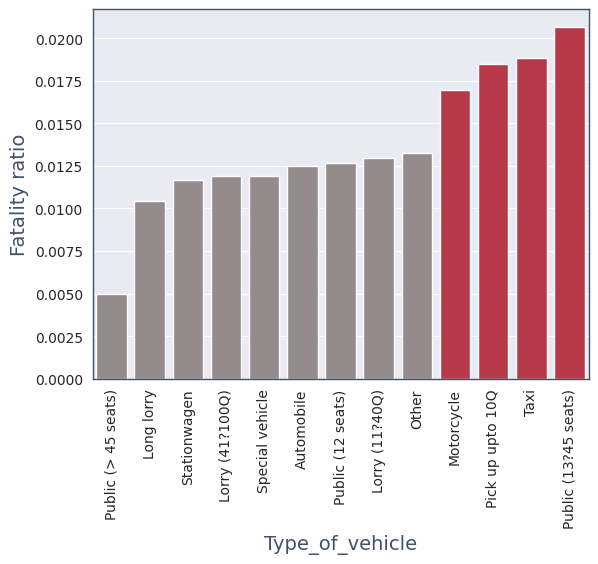

In [11]:
fatal_plot(1, 'Type_of_vehicle', [-1, -2, -3, -4], subplot=False, sort=True)
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-block alert-info">
<b>Results</b> - In the fatal injury category.We see that most fatal injuries happen with no junction. And Y shaped roads.
    
- The number of vehicles involved are usually one or two.
- Most accidents also tend to happen in darkness with no lighting.Which is very self-explanatory. 


- Most fatal accidents happen on rainy days, hinting at a lower controllability of the vehicle. 


- The most fatal type of collision happens with pedestrians. 


- And most fatal accidents happens on Saturday and Sunday.When people are most relaxed. 


- And we also see that in vehicle types such as motorcycle pickup trucks, taxi and public transportation actually tends to lead to the most fatal outcomes of all of the accidents. 

    

</div>

In [12]:
def crossdf(col):
    """
    Return a pandas crosstab for the given column against the target variable
    """
    crossdf = pd.crosstab(df['Accident_severity'], df[col], normalize='index')
    crossdf = crossdf.reset_index()
    return crossdf

#example
df1 = crossdf('Sex_of_driver')
df1

Sex_of_driver,Accident_severity,Female,Male,Unknown
0,Fatal injury,0.031646,0.962025,0.006329
1,Serious Injury,0.059667,0.930006,0.010327
2,Slight Injury,0.056841,0.927892,0.015266


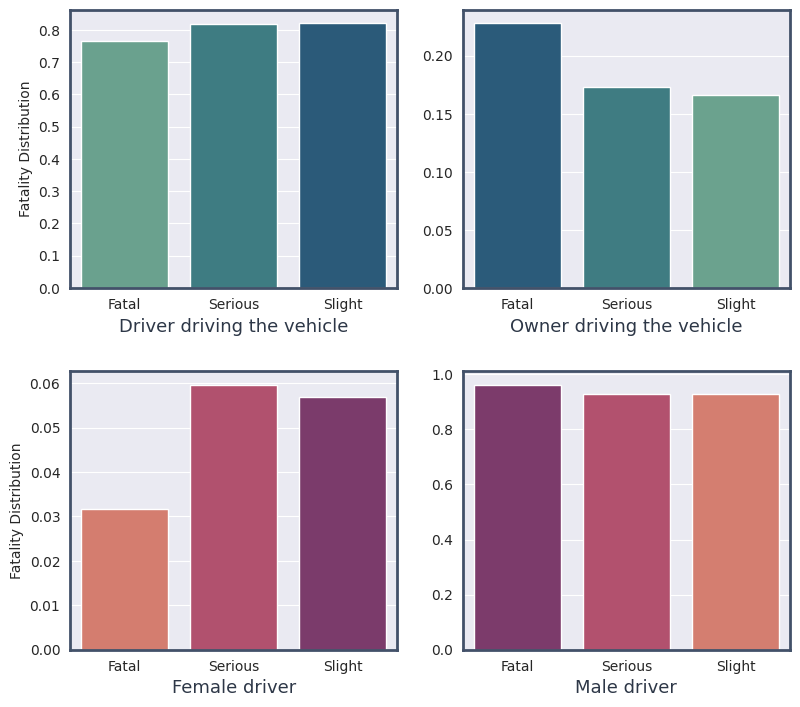

In [13]:
plt.figure(figsize=(8, 8))
custom_labels = ['Fatal', 'Serious', 'Slight']

plt.subplot(2, 2, 1)
sns.barplot(data = crossdf('Vehicle_driver_relation'),  x = 'Accident_severity', y = 'Employee', palette = 'crest')
plt.xlabel('Driver driving the vehicle', fontsize= 13).set_color('#2d3747')
plt.ylabel('Fatality Distribution')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)   


plt.subplot(2, 2, 2)
sns.barplot(data = crossdf('Vehicle_driver_relation'),  x = 'Accident_severity', y = 'Owner', palette = 'crest_r')
plt.xlabel('Owner driving the vehicle', fontsize= 13).set_color('#2d3747')
plt.ylabel('')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)


plt.subplot(2, 2, 3)
sns.barplot(data = crossdf('Sex_of_driver'),  x = 'Accident_severity', y = 'Female', palette = 'flare')
plt.xlabel('Female driver', fontsize= 13).set_color('#2d3747')
plt.ylabel('Fatality Distribution')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)

plt.subplot(2, 2, 4)
sns.barplot(data = crossdf('Sex_of_driver'),  x = 'Accident_severity', y = 'Male', palette = 'flare_r')
plt.xlabel('Male driver', fontsize= 13).set_color('#2d3747')
plt.ylabel('')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)

<div class="alert alert-block alert-info">
<b>Results:</b> In the drivers sacks and driver ownership category.We see that drivers who are driving vehicles that they don't own.Tend to result in a fairly even split between fatal, serious and slight accidents. However.When the operator of the vehicle is the owner of the vehicle.Fatal accident tends to happen more than serious in light ones. 

And in the difference of sex. Contrary to the sexist stereotypes. Female drivers tend to end up in way less fatal accidents than male drivers. And mostly results in mild and slight accidents

</div>

# Final Analysis
##### Based on the analysis of the data regarding road accidents, several trends and patterns emerge, providing insights into the factors contributing to the severity and occurrence of accidents:


### 1. Severity of Accidents:

- Majority of accidents result in slight injuries, indicating that most incidents are not fatal but still lead to injuries.
  Fatal accidents tend to occur more frequently on rainy days, suggesting decreased vehicle control under such conditions.
  The most fatal type of collision involves pedestrians, highlighting the vulnerability of pedestrians on the road.

### 2. Day and Time Analysis:

- Accidents are more common on Fridays, potentially due to increased traffic and rush hours as people head home at the end of the work week.
  Fatal accidents are more prevalent on Saturdays and Sundays, possibly when people are more relaxed and less cautious.

### 3. Driver Characteristics:

- Drivers in the 18 to 50 age range are involved in the majority of accidents, indicating a high accident rate among this demographic.
  Vehicles driven by individuals who do not own them tend to have a fairly even split between fatal, serious, and slight accidents, whereas accidents involving vehicle owners are more likely to be fatal.

### 4. Vehicle and Road Conditions:

- Motorcycle pickup trucks, taxis, and public transportation vehicles tend to have the most fatal outcomes in accidents, suggesting the need for improved safety measures for these vehicle types.
  Road types such as Y shapes and no junctions, as well as crossing road types, are associated with the highest counts of accidents.
  Accidents mostly occur in darkness with no lighting, underscoring the importance of proper lighting and visibility on roads.

### 5. Gender Differences:

- Contrary to stereotypes, female drivers tend to be involved in fewer fatal accidents compared to male drivers, with most incidents resulting in mild or slight injuries.

# Conclusion:

#### **In conclusion, the analysis reveals various factors influencing road accidents, including driver age, day and time of the week, road and weather conditions, vehicle types, and driver characteristics. Understanding these patterns can inform targeted interventions and safety measures to reduce the frequency and severity of road accidents, such as improving road infrastructure, enhancing vehicle safety features, and promoting safe driving practices among all road users. Additionally, efforts should be made to debunk stereotypes and promote gender-neutral approaches to road safety.**